In [15]:
import pandas as pd
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import math
import warnings
warnings.simplefilter('ignore')

<img src="../image/l1.svg"> <br>

## p = 1  L1 Norm
## p = 2  L2 Norm

https://en.wikipedia.org/wiki/Norm_(mathematics)

# L1

In [2]:
np.random.seed(20)
data = np.random.randint(-5, 6, size=(2, 2))
data

df = pd.DataFrame(data)
df

,0,1
0,-2,5
1,5,4


In [3]:
linalg.norm(df, ord=1, axis=1) # row별 L1 적용시킴 => 절대값의 합

array([7., 9.])

# L2

In [4]:
np.random.seed(20)
data = np.random.randint(1, 10, size=(3, 2))
data

df = pd.DataFrame(data)
df

,0,1
0,4,5
1,7,8
2,3,1


In [5]:
linalg.norm(df, ord=2, axis=1) # 제곱의 합에다 루트를 씌운 것

array([ 6.40312424, 10.63014581,  3.16227766])

In [6]:
np.sqrt(4**2 + 5**2) # 유클리드 거리

6.4031242374328485

In [7]:
np.sqrt(7**2 + 8**2) # 유클리드 거리

10.63014581273465

In [8]:
np.sqrt(3**2 + 1**2) # 유클리드 거리

3.1622776601683795

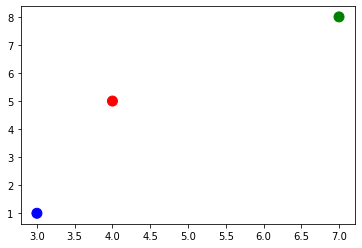

In [9]:
# 유클리드 거리

plt.scatter( df[0], df[1], s=100, c=['r', 'g', 'b'] )
plt.show()

# cost

In [10]:
x_data = np.array([1, 2, 3])
y_data = np.array([1, 2, 3])

In [11]:
w=0
n=len(x_data)
hy = w*x_data
print(hy)
loss = np.sum(((hy - y_data)**2)/n)
loss

[0 0 0]


4.666666666666666

In [12]:
def cost(x, y, w):
    n=len(x)
    hy = w*x # 예측값
    loss = np.sum(((hy - y)**2)/n)  # cost
    return loss

In [13]:
print( cost( x_data, y_data, 0) )
print( cost( x_data, y_data, 1) )
print( cost( x_data, y_data, 2) )

4.666666666666666
0.0
4.666666666666666


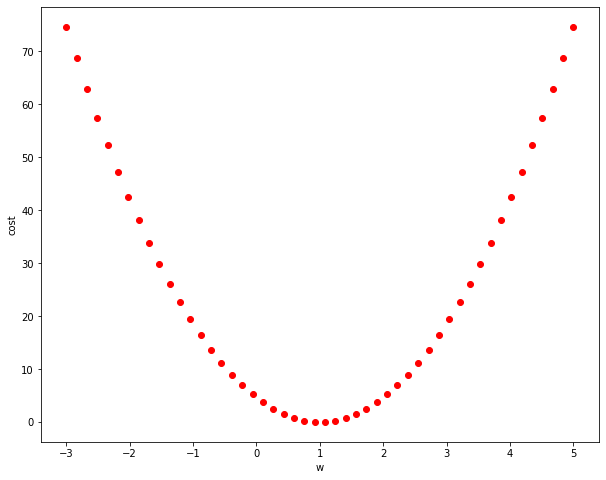

In [14]:
plt.figure(figsize=(10, 8))
plt.xlabel('w')
plt.ylabel('cost')
for w in np.linspace(-3, 5, 50):
    c = cost(x_data, y_data, w)
    plt.plot(w, c, 'ro')
plt.show()

## L2 norm

In [27]:
def cost_l2norm(x, y, w, a):
    n=len(x)
    hy = w*x # 예측값
    loss = np.sum(((hy - y)**2)/n) + a*(w**2) # L2 norm # 특성 데이터가 하나일 때
    return loss

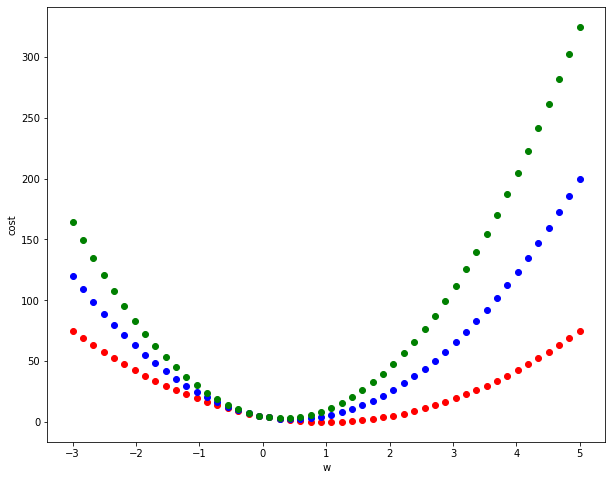

In [36]:
plt.figure(figsize=(10, 8))
plt.xlabel('w')
plt.ylabel('cost')
for w in np.linspace(-3, 5, 50):
    c = cost_l2norm(x_data, y_data, w, a=0)
    plt.plot(w, c, 'ro')
    c = cost_l2norm(x_data, y_data, w, a=5) # 그래프가 왼쪽으로 치우쳐짐
    plt.plot(w, c, 'bo')
    c = cost_l2norm(x_data, y_data, w, a=10) # 그래프가 왼쪽으로 치우쳐짐
    plt.plot(w, c, 'go')
plt.show()

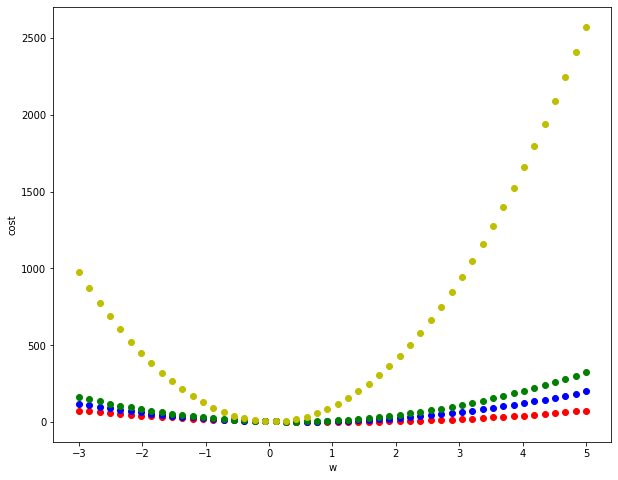

In [35]:
plt.figure(figsize=(10, 8))
plt.xlabel('w')
plt.ylabel('cost')
for w in np.linspace(-3, 5, 50):
    c = cost_l2norm(x_data, y_data, w, a=0)
    plt.plot(w, c, 'ro')
    c = cost_l2norm(x_data, y_data, w, a=5) # 그래프가 왼쪽으로 치우쳐짐
    plt.plot(w, c, 'bo')
    c = cost_l2norm(x_data, y_data, w, a=10) # 그래프가 왼쪽으로 치우쳐짐
    plt.plot(w, c, 'go')
    c = cost_l2norm(x_data, y_data, w, a=100) # 그래프가 왼쪽으로 치우쳐짐
    plt.plot(w, c, 'yo')
plt.show()

#### 결론 : a값이 커질 수록 w(기울기)의 최적값은 0에 근접해진다 
#### 기울기가 0이라는 의미는 해당 특성 데이터를 무시해라!

## L1 norm

In [29]:
math.fabs(-2)

2.0

In [30]:
def cost_l1norm(x, y, w, a):
    n=len(x)
    hy = w*x # 예측값
    loss = np.sum(((hy - y)**2)/n) + a*math.fabs(w) # L1 norm 
    return loss

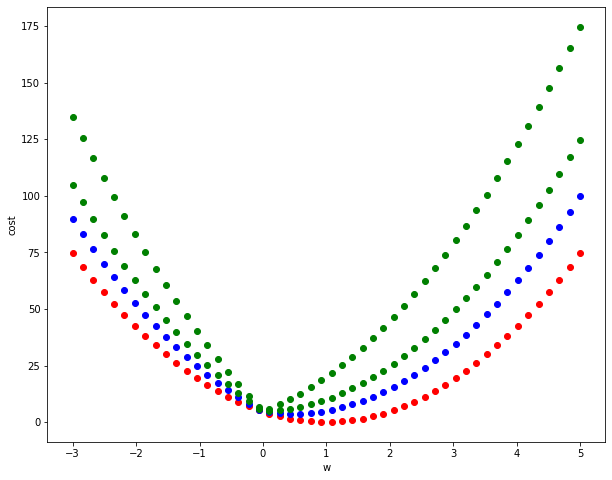

In [37]:
plt.figure(figsize=(10, 8))
plt.xlabel('w')
plt.ylabel('cost')
for w in np.linspace(-3, 5, 50):
    c = cost_l1norm(x_data, y_data, w, a=0)
    plt.plot(w, c, 'ro')
    c = cost_l1norm(x_data, y_data, w, a=5) # 그래프가 왼쪽으로 치우쳐짐
    plt.plot(w, c, 'bo')
    c = cost_l1norm(x_data, y_data, w, a=10) # 그래프가 왼쪽으로 치우쳐짐
    plt.plot(w, c, 'go')
    c = cost_l1norm(x_data, y_data, w, a=20) # 그래프가 왼쪽으로 치우쳐짐
    plt.plot(w, c, 'go')
plt.show()

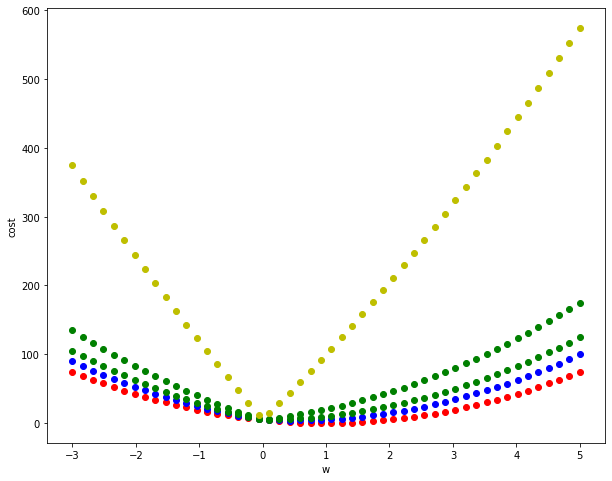

In [34]:
plt.figure(figsize=(10, 8))
plt.xlabel('w')
plt.ylabel('cost')
for w in np.linspace(-3, 5, 50):
    c = cost_l1norm(x_data, y_data, w, a=0)
    plt.plot(w, c, 'ro')
    c = cost_l1norm(x_data, y_data, w, a=5) # 그래프가 왼쪽으로 치우쳐짐
    plt.plot(w, c, 'bo')
    c = cost_l1norm(x_data, y_data, w, a=10) # 그래프가 왼쪽으로 치우쳐짐
    plt.plot(w, c, 'go')
    c = cost_l1norm(x_data, y_data, w, a=20) # 그래프가 왼쪽으로 치우쳐짐
    plt.plot(w, c, 'go')
    c = cost_l1norm(x_data, y_data, w, a=100) # 그래프가 왼쪽으로 치우쳐짐
    plt.plot(w, c, 'yo')
plt.show()

#### L1규제는 절대값을 취하기 때문에 뾰족해짐